In [4]:
import pandas as pd

# Dosya yolu
excel_file_path = 'Guncellenmis_Uygulama_Kullanım_Verileri.xlsx'

# Excel dosyasını yükleyelim
excel_data = pd.read_excel(excel_file_path)

# İlk beş satırı gösterelim
excel_data.head()


,Uygulama Adı,Kullanım Süresi (Saat),Kullanıcı ID,Cihaz Tipi,İşletim Sistemi,Kullanım Tarihi
0,Instagram,4.200833,8891,Xiaomi Note 9 Pro,Android,2023-11-23
1,YouTube,2.892778,5373,Xiaomi Note 9 Pro,Android,2023-11-23
2,WhatsApp,1.443333,6874,Xiaomi Note 9 Pro,Android,2023-11-23
3,Chrome,0.208611,7744,Xiaomi Note 9 Pro,Android,2023-11-23
4,Gardrops,0.154722,4468,Xiaomi Note 9 Pro,Android,2023-11-23


In [9]:
import numpy as np

# Enerji tüketimi ve karbon emisyonu için rastgele değerler eklemek için np.random kullanılıyor
np.random.seed(0)  # Reproducibility için random seed
excel_data['Enerji Tüketimi (kWh)'] = np.random.uniform(0.1, 1.5, size=len(excel_data))
excel_data['Karbon Emisyonu (kg CO2)'] = excel_data['Enerji Tüketimi (kWh)'] * 0.5  # Örnek bir katsayı

# Güncellenmiş veri setini Excel dosyası olarak kaydedelim
updated_excel_output_file_path = 'Guncellenmis_Uygulama_Kullanım_Verileri_Ile_Enerji_ve_Karbon.xlsx'
excel_data.to_excel(updated_excel_output_file_path, index=False)

updated_excel_output_file_path
excel_data.head()


,Uygulama Adı,Kullanım Süresi (Saat),Kullanıcı ID,Cihaz Tipi,İşletim Sistemi,Kullanım Tarihi,Enerji Tüketimi (kWh),Karbon Emisyonu (kg CO2)
0,Instagram,4.200833,8891,Xiaomi Note 9 Pro,Android,2023-11-23,0.868339,0.434169
1,YouTube,2.892778,5373,Xiaomi Note 9 Pro,Android,2023-11-23,1.101265,0.550633
2,WhatsApp,1.443333,6874,Xiaomi Note 9 Pro,Android,2023-11-23,0.943869,0.471934
3,Chrome,0.208611,7744,Xiaomi Note 9 Pro,Android,2023-11-23,0.862836,0.431418
4,Gardrops,0.154722,4468,Xiaomi Note 9 Pro,Android,2023-11-23,0.693117,0.346558


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Özellik ve hedef değişkenlerini belirleme
X = excel_data[['Kullanım Süresi (Saat)', 'Enerji Tüketimi (kWh)']]
y = excel_data['Karbon Emisyonu (kg CO2)']

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Lineer Regresyon modelini oluşturma ve eğitme
model = LinearRegression()
model.fit(X_train, y_train)

# Test seti üzerinde tahminler yapma
y_pred = model.predict(X_test)

# Model performansını değerlendirme
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(1.5407439555097887e-33, 1.0)

In [11]:
# Modelin performansını gösteren bir tablo oluşturalım
model_performance = pd.DataFrame({
    'Metrik': ['Ortalama Karesel Hata (MSE)', 'R² Değeri'],
    'Değer': [mse, r2]
})

model_performance

,Metrik,Değer
0,Ortalama Karesel Hata (MSE),1.540744e-33
1,R² Değeri,1.000000e+00


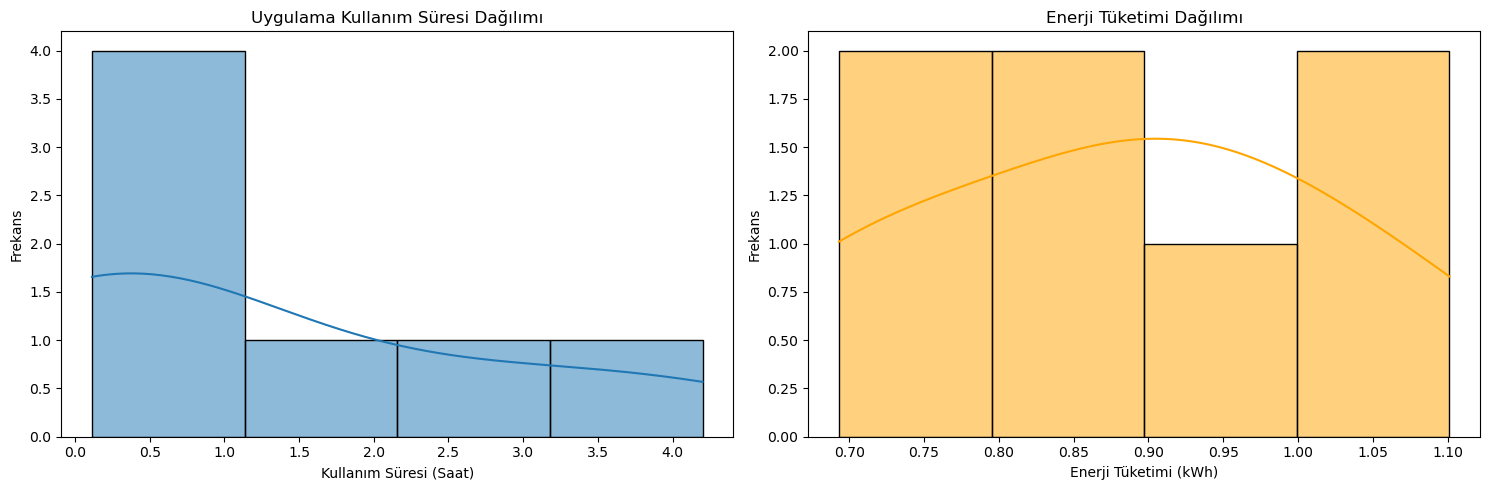

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Veri setinin temel istatistikleri için grafikler
plt.figure(figsize=(15, 5))

# Kullanım Süresi Dağılımı
plt.subplot(1, 2, 1)
sns.histplot(excel_data['Kullanım Süresi (Saat)'], kde=True)
plt.title('Uygulama Kullanım Süresi Dağılımı')
plt.xlabel('Kullanım Süresi (Saat)')
plt.ylabel('Frekans')

# Enerji Tüketimi Dağılımı
plt.subplot(1, 2, 2)
sns.histplot(excel_data['Enerji Tüketimi (kWh)'], kde=True, color='orange')
plt.title('Enerji Tüketimi Dağılımı')
plt.xlabel('Enerji Tüketimi (kWh)')
plt.ylabel('Frekans')

# Grafikleri göster
plt.tight_layout()
plt.show()


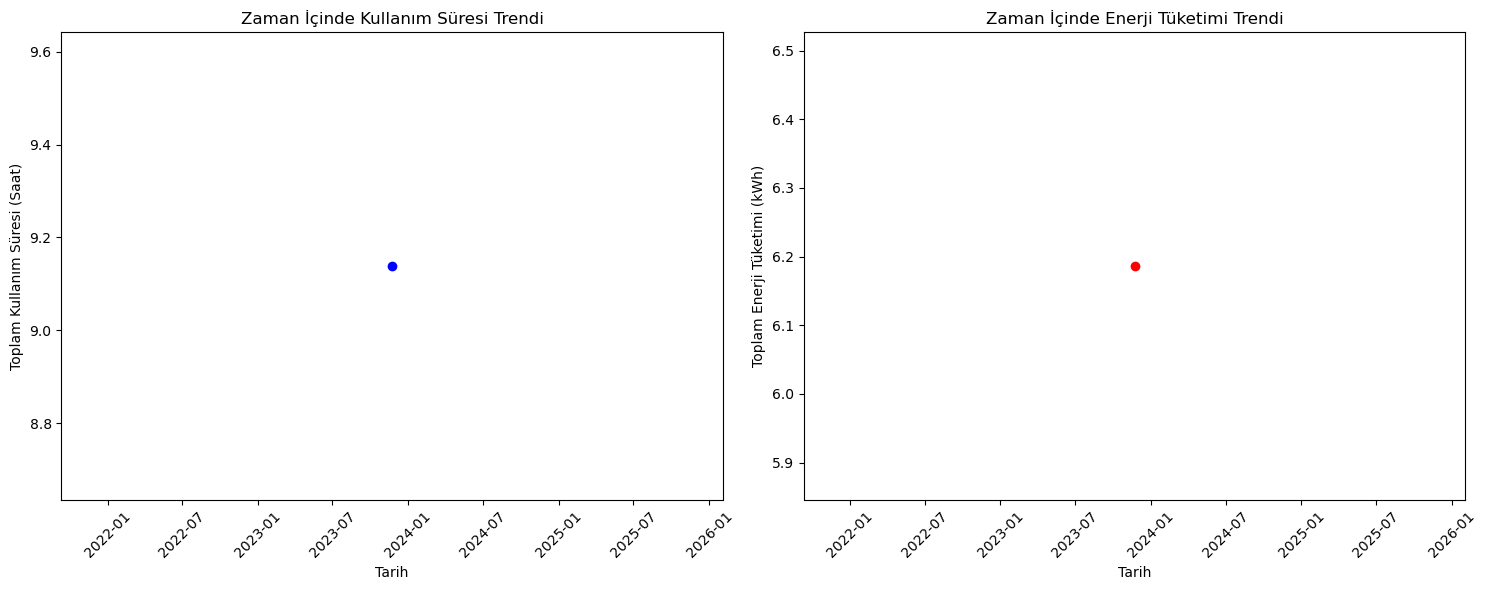

In [13]:
# Zaman serisi analizi için veri setini tarihe göre sıralayalım ve gerekli verileri seçelim
excel_data['Kullanım Tarihi'] = pd.to_datetime(excel_data['Kullanım Tarihi'])
time_series_data = excel_data.groupby('Kullanım Tarihi').agg({'Kullanım Süresi (Saat)': 'sum', 'Enerji Tüketimi (kWh)': 'sum'}).reset_index()

# Zaman serisi grafiği çizelim
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(time_series_data['Kullanım Tarihi'], time_series_data['Kullanım Süresi (Saat)'], marker='o', color='b')
plt.title('Zaman İçinde Kullanım Süresi Trendi')
plt.xlabel('Tarih')
plt.ylabel('Toplam Kullanım Süresi (Saat)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.plot(time_series_data['Kullanım Tarihi'], time_series_data['Enerji Tüketimi (kWh)'], marker='o', color='r')
plt.title('Zaman İçinde Enerji Tüketimi Trendi')
plt.xlabel('Tarih')
plt.ylabel('Toplam Enerji Tüketimi (kWh)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
